In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df = pd.read_csv("Advertising.csv")

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df["total_spend"] = df.TV+df.radio+df.newspaper

In [10]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


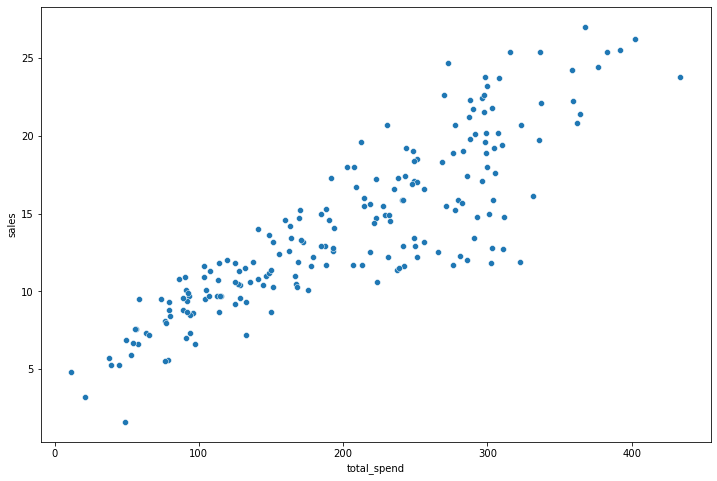

In [13]:
sns.scatterplot(data=df, x="total_spend", y="sales");

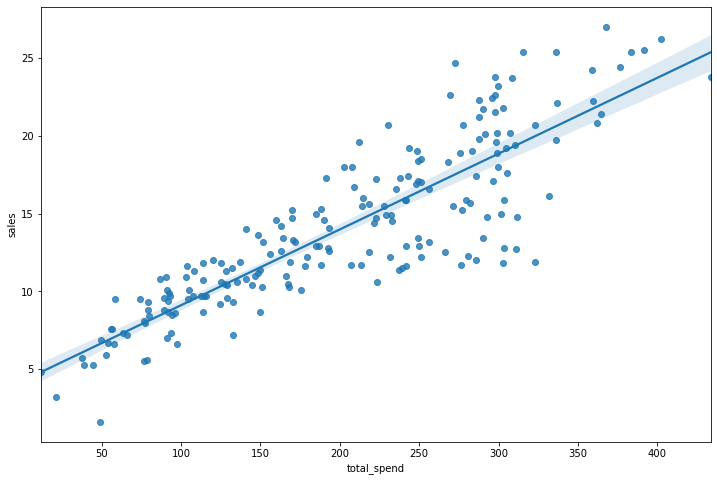

In [14]:
sns.regplot(data=df, x="total_spend", y="sales");

In [16]:
X = df.total_spend  # "X" is our feature on which the ml algorithims rely on the make predicts
y = df.sales  # "y" is our label 

In [19]:
# OLS: Ordinary Least Squares
# y = mx + b
# y = B1x + B0

help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [21]:
np.polyfit(X, y, deg=1)  # the value on the left is B1 and on the rigth is B0

array([0.04868788, 4.24302822])

In [23]:
np.polyfit(X, y, deg=1)[0]

0.04868787931904817

In [24]:
np.polyfit(X, y, deg=1)[1]

4.243028216036326

In [22]:
potential_spend = np.linspace(0, 500, 100)

In [25]:
# y = B1x + B0

predicted_sales = np.polyfit(X, y, deg=1)[0]*potential_spend + np.polyfit(X, y, deg=1)[1]

In [26]:
predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

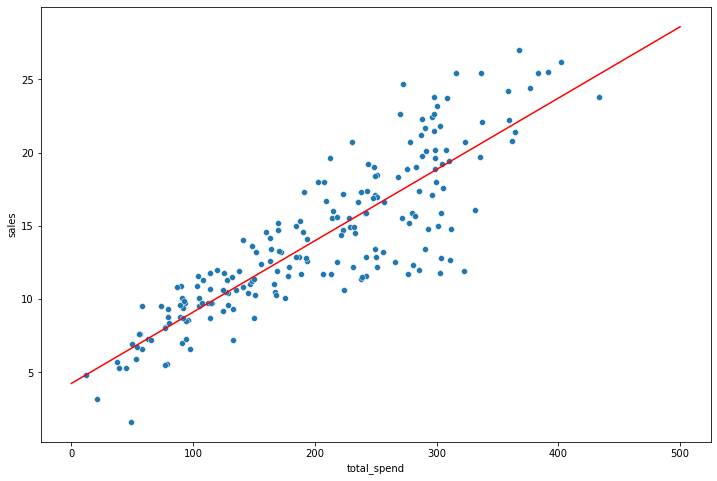

In [30]:
sns.scatterplot(data=df, x="total_spend", y="sales")
plt.plot(potential_spend, predicted_sales, color="red");

In [32]:
exp_spend = 200
predicted_sales = np.polyfit(X, y, deg=1)[0]*exp_spend + np.polyfit(X, y, deg=1)[1]

In [33]:
predicted_sales

13.98060407984596

### Higher Polynomial Degree

In [36]:
# y = B3x**3 + B2x**2 + B1x + B0

np.polyfit(X, y, deg=3)  # starting from left, X^3, X^2, X, and y intercept

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [37]:
pot_spend = np.linspace(0, 500, 100)

In [38]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

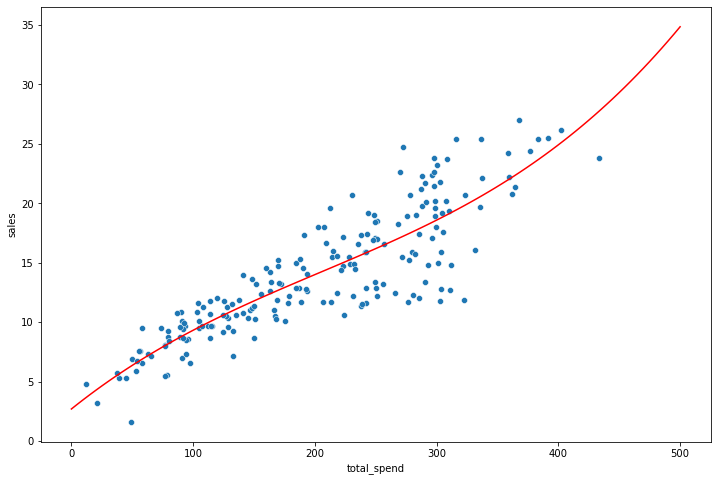

In [39]:
sns.scatterplot(data=df, x="total_spend", y="sales")
plt.plot(pot_spend, pred_sales, color="red");

In [1]:
X = df.drop("sales", axis=1)
y = df.sales

NameError: name 'df' is not defined

In [ ]:
np.polyfit(X, y, deg=1)